<center><h1>Capstone Project - Car Accident Severity</h1></center>

Create a "Machine Learning" Model to determine "Accident Severity" based on various input parameters like Human Fatality, Traffic Delay, Property Damage or any other type of accident bad impact.

In [1]:
import pandas as pd
import numpy as np

In [2]:
print("Hello Capstone Project Course !!!")

Hello Capstone Project Course !!!


In [3]:
!wget -O Data-Collisions.csv https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv

'wget' is not recognized as an internal or external command,
operable program or batch file.


## Load Data From CSV File

In [4]:
df = pd.read_csv('Data-Collisions.csv')
df.head()

C:\Users\BHANUBOMMIDI\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (33) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


Let's try to plot the Top 5 Weather conditions for the Car Accidents.

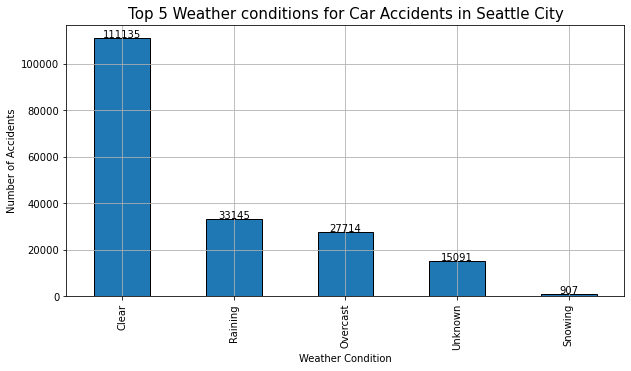

In [5]:
import matplotlib.pyplot as plt

fig, ax=plt.subplots(figsize=(10,5))

values = df['WEATHER'].value_counts().sort_values(ascending=False).head(5)
df['WEATHER'].value_counts().sort_values(ascending=False).head(5).plot.bar(width=0.5,edgecolor='k',align='center')

ax.tick_params(labelsize=10)
for i, v in enumerate(values):
    ax.text(i, v+200, "%d" %v, ha="center")

plt.title('Top 5 Weather conditions for Car Accidents in Seattle City',fontsize=15)
plt.xlabel('Weather Condition',fontsize=10)
plt.ylabel('Number of Accidents',fontsize=10)
plt.grid()

As you can see, the majority of the Car Accidents in Seattle City seems to happen even when the weather is "Clear".

Now, let's check the counts by "Severity Code" to validate if the Input data set is "Balanced" or "Unbalanced" to avoid creating a biased ML model.

In [6]:
df['SEVERITYCODE'].value_counts()

1    136485
2     58188
Name: SEVERITYCODE, dtype: int64

Input data is "Unbalanced" i.e.; there are twice the entries for "Severity 1", compared to "Severity 2" which might result in the creation of a biased ML model. Balance the Sheet, by randomly removing "Severity 1" entries such that they are in-line with the number of entries for "Severity 2".

In [7]:
df_majority = df[df['SEVERITYCODE']==1]
df_minority  = df[df['SEVERITYCODE']==2]

df_majority = df_majority.sample(len(df_minority), random_state=0)
df = pd.concat([df_majority,df_minority])
df = df.sample(frac=1, random_state=0)

Re-check the counts by "Severity Code" to confirm that the new data set is now "Balanced".

In [8]:
df['SEVERITYCODE'].value_counts()

2    58188
1    58188
Name: SEVERITYCODE, dtype: int64

# Data Visualization and Pre-processing

Let's deduce additional attributes like Year, Month, Day, Hour, Day of the Week etc.; from Incident Date-Time.

In [9]:
df.rename({'X': 'LONGITUDE', 'Y': 'LATITUDE'}, axis=1, inplace=True)
df['INCDTTM'] = pd.to_datetime(df['INCDTTM'])
df['INCYEAR']=df['INCDTTM'].dt.year
df['INCMNTH']=df['INCDTTM'].dt.strftime('%m')
df['INCDAY']=df['INCDTTM'].dt.day
df['INCHOUR']=df['INCDTTM'].dt.hour
df['INCWKDY']=df['INCDTTM'].dt.strftime('%w')

Let's try to see how the Accident data is spread across by Year to see, if there is any linear spread or if there are any outliers.

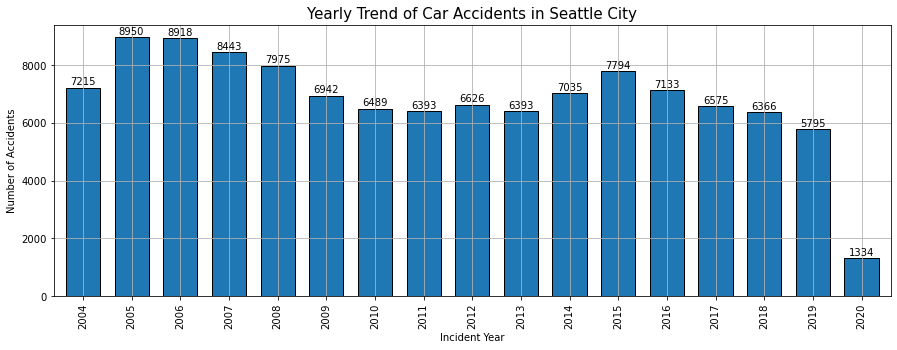

In [10]:
fig, ax=plt.subplots(figsize=(15,5))

values = df['INCYEAR'].value_counts().sort_index(ascending=True)
df['INCYEAR'].value_counts().sort_index(ascending=True).head(20).plot.bar(width=0.7,edgecolor='k',align='center')

ax.tick_params(labelsize=10)
for i, v in enumerate(values):
    ax.text(i, v+100, "%d" %v, ha="center")

plt.title('Yearly Trend of Car Accidents in Seattle City',fontsize=15)
plt.xlabel('Incident Year',fontsize=10)
plt.ylabel('Number of Accidents',fontsize=10)
plt.grid()

In [11]:
df['UNDERINFL'].replace({'N':0, 'Y':1}, inplace = True)
df['ST_COLCODE'].replace(' ', '31', inplace = True)

Let's find out the count of missing values for various attributes.

In [12]:
missing_df = df.isna().sum(axis=0).reset_index()
missing_df.columns = ['COL_NAME','MISS_COUNT']
missing_df['MISS_RATIO'] = missing_df['MISS_COUNT'] / df.shape[0]
missing_df = missing_df.sort_values(by='MISS_RATIO')
missing_df.loc[missing_df['MISS_RATIO'] != 0]

,COL_NAME,MISS_COUNT,MISS_RATIO
33,ST_COLCODE,16,0.000137
8,ADDRTYPE,906,0.007785
10,LOCATION,1275,0.010956
26,UNDERINFL,2683,0.023055
15,COLLISIONTYPE,2699,0.023192
34,ST_COLDESC,2699,0.023192
28,ROADCOND,2758,0.023699
27,WEATHER,2795,0.024017
29,LIGHTCOND,2829,0.024309
2,LATITUDE,2875,0.024704


## Pre-processing:  Feature Selection / Extraction

Let's select the subset of the columns which are relevant and exclude the remaining ones i.e.; like Key Fields, Location, Description etc.; in addition to the columns for which more than 50% of the values are missing.

In [13]:
df_data = df[['SEVERITYCODE','LATITUDE','LONGITUDE','ADDRTYPE','COLLISIONTYPE','PERSONCOUNT','PEDCOUNT','PEDCYLCOUNT','VEHCOUNT','INCYEAR','INCMNTH','INCDAY','INCHOUR','INCWKDY','JUNCTIONTYPE','SDOT_COLCODE','UNDERINFL','WEATHER','ROADCOND','LIGHTCOND','ST_COLCODE','HITPARKEDCAR']]
df_data.head()

,SEVERITYCODE,LATITUDE,LONGITUDE,ADDRTYPE,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INCYEAR,...,INCHOUR,INCWKDY,JUNCTIONTYPE,SDOT_COLCODE,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,ST_COLCODE,HITPARKEDCAR
29959,2,47.628670,-122.320212,Intersection,Angles,2,0,0,2,2005,...,16,4,At Intersection (intersection related),11,0,Clear,Dry,Daylight,10,N
110326,1,47.679416,-122.290376,Intersection,Pedestrian,2,1,0,1,2012,...,15,6,At Intersection (intersection related),24,0,Clear,Dry,Daylight,2,N
5970,2,47.601695,-122.317823,Intersection,Angles,2,0,0,2,2004,...,0,5,At Intersection (intersection related),11,1,Clear,Dry,Dark - Street Lights On,10,N
130027,1,47.546051,-122.285158,Block,Rear Ended,2,0,0,2,2014,...,19,3,Mid-Block (but intersection related),14,0,Unknown,Unknown,Unknown,14,N
76480,2,47.526469,-122.324681,Block,Rear Ended,6,0,0,2,2009,...,0,1,Mid-Block (but intersection related),14,0,Raining,Snow/Slush,Dark - Street Lights On,14,N


Let's cross-check the Data Types of the various attributes to accordingly convert them, if needed.

In [14]:
df_data.dtypes

SEVERITYCODE       int64
LATITUDE         float64
LONGITUDE        float64
ADDRTYPE          object
COLLISIONTYPE     object
PERSONCOUNT        int64
PEDCOUNT           int64
PEDCYLCOUNT        int64
VEHCOUNT           int64
INCYEAR            int64
INCMNTH           object
INCDAY             int64
INCHOUR            int64
INCWKDY           object
JUNCTIONTYPE      object
SDOT_COLCODE       int64
UNDERINFL         object
WEATHER           object
ROADCOND          object
LIGHTCOND         object
ST_COLCODE        object
HITPARKEDCAR      object
dtype: object

Let's translate the "Categorical" data to Codes to determine the correlation of these fields with the "Severity" Code.

In [15]:
df_data['SEVERITYCODE'].replace('2b', '2.5', inplace = True)
df_data['SEVERITYCODE'] = pd.to_numeric(df_data['SEVERITYCODE'])

df_data['ADDRTYPE'] = df_data['ADDRTYPE'].astype('category')
df_data['ADDRTYPE'] = df_data['ADDRTYPE'].cat.codes

df_data['COLLISIONTYPE'] = df_data['COLLISIONTYPE'].astype('category')
df_data['COLLISIONTYPE'] = df_data['COLLISIONTYPE'].cat.codes

df_data['JUNCTIONTYPE'] = df_data['JUNCTIONTYPE'].astype('category')
df_data['JUNCTIONTYPE'] = df_data['JUNCTIONTYPE'].cat.codes

df_data['WEATHER'] = df_data['WEATHER'].astype('category')
df_data['WEATHER'] = df_data['WEATHER'].cat.codes

df_data['ROADCOND'] = df_data['ROADCOND'].astype('category')
df_data['ROADCOND'] = df_data['ROADCOND'].cat.codes

df_data['LIGHTCOND'] = df_data['LIGHTCOND'].astype('category')
df_data['LIGHTCOND'] = df_data['LIGHTCOND'].cat.codes

df_data['HITPARKEDCAR'] = df_data['HITPARKEDCAR'].astype('category')
df_data['HITPARKEDCAR'] = df_data['HITPARKEDCAR'].cat.codes

df_data['INCMNTH'] = pd.to_numeric(df_data['INCMNTH'])
df_data['INCWKDY'] = pd.to_numeric(df_data['INCWKDY'])
df_data['UNDERINFL'] = pd.to_numeric(df_data['UNDERINFL'])
df_data['ST_COLCODE'] = pd.to_numeric(df_data['ST_COLCODE'])

df_data.head()

C:\Users\BHANUBOMMIDI\Anaconda3\lib\site-packages\pandas\core\generic.py:6746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)
<ipython-input-15-a5f8c1f53cd0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_data['SEVERITYCODE'] = pd.to_numeric(df_data['SEVERITYCODE'])
<ipython-input-15-a5f8c1f53cd0>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

,SEVERITYCODE,LATITUDE,LONGITUDE,ADDRTYPE,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INCYEAR,...,INCHOUR,INCWKDY,JUNCTIONTYPE,SDOT_COLCODE,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,ST_COLCODE,HITPARKEDCAR
29959,2,47.628670,-122.320212,2,0,2,0,0,2,2005,...,16,4,1,11,0.0,1,0,5,10.0,0
110326,1,47.679416,-122.290376,2,6,2,1,0,1,2012,...,15,6,1,24,0.0,1,0,5,2.0,0
5970,2,47.601695,-122.317823,2,0,2,0,0,2,2004,...,0,5,1,11,1.0,1,0,2,10.0,0
130027,1,47.546051,-122.285158,1,7,2,0,0,2,2014,...,19,3,3,14,0.0,10,7,8,14.0,0
76480,2,47.526469,-122.324681,1,7,6,0,0,2,2009,...,0,1,3,14,0.0,6,5,2,14.0,0


Now let's generate the "Correlation" coefficients for all the various attributes with respect to the "Severity Code".

In [16]:
x_cols = [col for col in df_data.columns if col not in ['SEVERITYCODE']]

labels = []
values = []
for col in x_cols:
    labels.append(col)
    values.append(round(np.corrcoef(df_data[col].values, df_data.SEVERITYCODE.values)[0,1],2))

df_corr = pd.DataFrame({'COL_LABEL':labels, 'CORR_VALUE':values})
df_corr = df_corr.sort_values(by='CORR_VALUE')

Let's select only those columns wth a correlation value <= -0.04 and >= 0.04 and for Model fitment.

In [17]:
df_corr_sel = df_corr.loc[(df_corr['CORR_VALUE']>=0.05) | (df_corr['CORR_VALUE'] <= -0.05)]
df_corr_sel

,COL_LABEL,CORR_VALUE
13,JUNCTIONTYPE,-0.15
20,HITPARKEDCAR,-0.13
3,COLLISIONTYPE,-0.12
16,WEATHER,-0.12
7,VEHCOUNT,-0.06
17,ROADCOND,-0.05
4,PERSONCOUNT,0.14
6,PEDCYLCOUNT,0.19
14,SDOT_COLCODE,0.19
2,ADDRTYPE,0.21


In [18]:
# !conda install -c anaconda seaborn -y

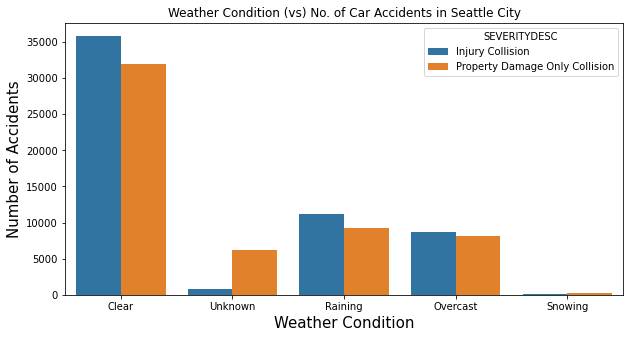

In [19]:
import seaborn as sns

fig, ax=plt.subplots(figsize=(10,5))

ax = sns.countplot(x="WEATHER", hue="SEVERITYDESC", data=df[df["WEATHER"].isin(['Clear', 'Raining', 'Overcast', 'Unknown', 'Snowing'])])
ax.tick_params(labelsize=10)

plt.title('Weather Condition (vs) No. of Car Accidents in Seattle City',fontsize=12)
plt.xlabel('Weather Condition',fontsize=15)
plt.ylabel('Number of Accidents',fontsize=15)
plt.show()

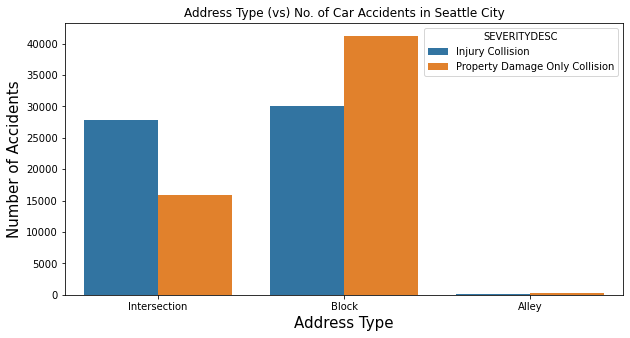

In [20]:
fig, ax=plt.subplots(figsize=(10,5))

ax = sns.countplot(x="ADDRTYPE", hue="SEVERITYDESC", data=df)
ax.tick_params(labelsize=10)

plt.title('Address Type (vs) No. of Car Accidents in Seattle City',fontsize=12)
plt.xlabel('Address Type',fontsize=15)
plt.ylabel('Number of Accidents',fontsize=15)
plt.show()

From the above table, we observe that "Junction Type" has a best negative correlation.

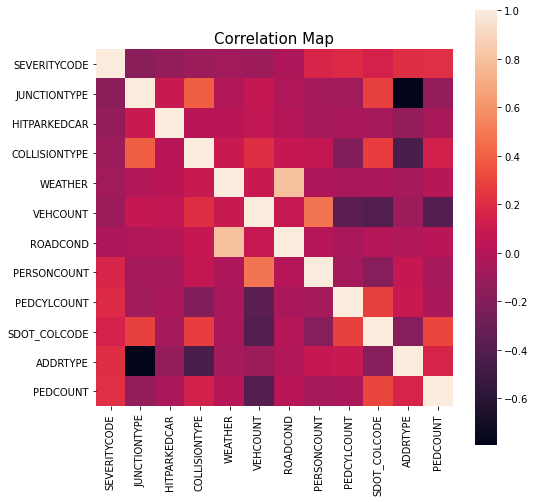

In [21]:
df_cols_sel = df_corr_sel.COL_LABEL.tolist()
df_cols_sel.insert(0, 'SEVERITYCODE') 
df_feature = df_data[df_cols_sel]
corr_mat = df_feature.corr(method='spearman')

fig,ax= plt.subplots(figsize=(8,8))
sns.heatmap(corr_mat,vmax=1,square = True)
plt.title('Correlation Map',fontsize=15)
plt.show()

### Feature & Label Selection

In [22]:
y = df_feature['SEVERITYCODE']
X = df_feature.drop(['SEVERITYCODE'], axis=1)
X[0:5]

,JUNCTIONTYPE,HITPARKEDCAR,COLLISIONTYPE,WEATHER,VEHCOUNT,ROADCOND,PERSONCOUNT,PEDCYLCOUNT,SDOT_COLCODE,ADDRTYPE,PEDCOUNT
29959,1,0,0,1,2,0,2,0,11,2,0
110326,1,0,6,1,1,0,2,0,24,2,1
5970,1,0,0,1,2,0,2,0,11,2,0
130027,3,0,7,10,2,7,2,0,14,1,0
76480,3,0,7,6,2,5,6,0,14,1,0


### Normalize Data

In [23]:
from sklearn.preprocessing import StandardScaler

X= StandardScaler().fit(X).transform(X)
X[0:5]

array([[-1.01794761, -0.17308419, -1.44059935, -0.67567888,  0.14278715,
        -0.66964064, -0.3659159 , -0.21327971, -0.46401365,  1.20869464,
        -0.23758883],
       [-1.01794761, -0.17308419,  0.60772425, -0.67567888, -1.35599501,
        -0.66964064, -0.3659159 , -0.21327971,  1.29334292,  1.20869464,
         3.81661024],
       [-1.01794761, -0.17308419, -1.44059935, -0.67567888,  0.14278715,
        -0.66964064, -0.3659159 , -0.21327971, -0.46401365,  1.20869464,
        -0.23758883],
       [ 0.33090889, -0.17308419,  0.94911152,  2.60469736,  0.14278715,
         1.25664529, -0.3659159 , -0.21327971, -0.05846983, -0.67207882,
        -0.23758883],
       [ 0.33090889, -0.17308419,  0.94911152,  1.14675237,  0.14278715,
         0.70627789,  2.46319844, -0.21327971, -0.05846983, -0.67207882,
        -0.23758883]])

Split the "Feature" and "Label" datasets to "Train" & "Test" datasets to loop through various Decision Tree depths to determine the best depth.

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=4)

print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (81463, 11) (81463,)
Test set: (34913, 11) (34913,)


# Classification - K Nearest Neighbor(KNN)

In [25]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

Ks = 10
mean_acc = np.zeros((Ks-1))

for n in range(1,Ks):
    knn = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=knn.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

print( "The best accuracy was", mean_acc.max(), "with k=", mean_acc.argmax()+1)
mean_acc

The best accuracy was 0.6930083350041532 with k= 9


array([0.64823991, 0.6315699 , 0.65436943, 0.65365337, 0.67533583,
       0.6677169 , 0.68432962, 0.67980408, 0.69300834])

In [26]:
knn = KNeighborsClassifier(n_neighbors = mean_acc.argmax()+1)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=9)

# Classification - Decision Tree

In [27]:
from sklearn.tree import DecisionTreeClassifier

dts = 10
dt_acc = np.zeros((dts-1))

for n in range(1,dts):
    dt = DecisionTreeClassifier(criterion="entropy", max_depth=n).fit(X_train,y_train)
    yhat=dt.predict(X_test)
    dt_acc[n-1] = metrics.accuracy_score(y_test, yhat)


print( "The best accuracy was", dt_acc[2:].max(), "with max_depth=", dt_acc[2:].argmax()+3)

The best accuracy was 0.7128576747916249 with max_depth= 9


In [28]:
dt = DecisionTreeClassifier(criterion="entropy", max_depth=dt_acc[2:].argmax()+3)
dt.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=9)

# Classification - Logistic Regression

In [29]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(C=0.01, solver='liblinear')
lr.fit(X_train,y_train)

LogisticRegression(C=0.01, solver='liblinear')

# Classification - Random Forest

In [30]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train,y_train)

RandomForestClassifier()

# Classification - Gradient Boost

In [31]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)
gb.fit(X_train,y_train)

GradientBoostingClassifier(learning_rate=1.0, max_depth=1, random_state=0)

# Model Evaluation using Test set

In [32]:
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [33]:
yhat_knn=knn.predict(X_test)
yhat_knn_prob = knn.predict_proba(X_test)

knn_alg = "KNN"
knn_jac_sim_score = jaccard_score(y_test, yhat_knn)
knn_f1_score = f1_score(y_test, yhat_knn, average='weighted')
knn_log_loss = log_loss(y_test, yhat_knn_prob)
knn_tn, knn_fp, knn_fn, knn_tp = confusion_matrix(y_test, yhat_knn).ravel()

knn_metrics = [knn_alg, round(knn_jac_sim_score, 3), round(knn_f1_score, 3), "N/A" if knn_log_loss > 1 else round(knn_log_loss,3), knn_tp, knn_fp, knn_fn, knn_tn]
knn_metrics

['KNN', 0.516, 0.693, 0.915, 12782, 5885, 4833, 11413]

In [34]:
yhat_dt=dt.predict(X_test)
yhat_dt_prob = dt.predict_proba(X_test)

dt_alg = "Decision Tree"
dt_jac_sim_score = jaccard_score(y_test, yhat_dt)
dt_f1_score = f1_score(y_test, yhat_dt, average='weighted')
dt_log_loss = log_loss(y_test, yhat_dt_prob)
dt_tn, dt_fp, dt_fn, dt_tp = confusion_matrix(y_test, yhat_dt).ravel()

dt_metrics = [dt_alg, round(dt_jac_sim_score, 3), round(dt_f1_score, 3), "N/A" if dt_log_loss > 1 else round(dt_log_loss,3), dt_tp, dt_fp, dt_fn, dt_tn]
dt_metrics

['Decision Tree', 0.524, 0.711, 0.578, 13850, 6260, 3765, 11038]

In [35]:
yhat_lr=lr.predict(X_test)
yhat_lr_prob = lr.predict_proba(X_test)

lr_alg = "Logistic Regression"
lr_jac_sim_score = jaccard_score(y_test, yhat_lr)
lr_f1_score = f1_score(y_test, yhat_lr, average='weighted')
lr_log_loss = log_loss(y_test, yhat_lr_prob)
lr_tn, lr_fp, lr_fn, lr_tp = confusion_matrix(y_test, yhat_lr).ravel()

lr_metrics = [lr_alg, round(lr_jac_sim_score, 3), round(lr_f1_score, 3), "N/A" if lr_log_loss > 1 else round(lr_log_loss,3), lr_tp, lr_fp, lr_fn, lr_tn]
lr_metrics

['Logistic Regression', 0.518, 0.665, 0.594, 10699, 4744, 6916, 12554]

In [36]:
yhat_rf=rf.predict(X_test)
yhat_rf_prob = rf.predict_proba(X_test)

rf_alg = "Random Forest"
rf_jac_sim_score = jaccard_score(y_test, yhat_rf)
rf_f1_score = f1_score(y_test, yhat_rf, average='weighted')
rf_log_loss = log_loss(y_test, yhat_rf_prob)
rf_tn, rf_fp, rf_fn, rf_tp = confusion_matrix(y_test, yhat_rf).ravel()

rf_metrics = [rf_alg, round(rf_jac_sim_score, 3), round(rf_f1_score, 3), "N/A" if rf_log_loss > 1 else round(rf_log_loss,3), rf_tp, rf_fp, rf_fn, rf_tn]
rf_metrics

['Random Forest', 0.516, 0.707, 0.624, 13909, 6452, 3706, 10846]

In [37]:
yhat_gb=gb.predict(X_test)
yhat_gb_prob = gb.predict_proba(X_test)

gb_alg = "Gradient Boost"
gb_jac_sim_score = jaccard_score(y_test, yhat_gb)
gb_f1_score = f1_score(y_test, yhat_gb, average='weighted')
gb_log_loss = log_loss(y_test, yhat_gb_prob)
gb_tn, gb_fp, gb_fn, gb_tp = confusion_matrix(y_test, yhat_gb).ravel()

gb_metrics = [gb_alg, round(gb_jac_sim_score, 3), round(gb_f1_score, 3), "N/A" if gb_log_loss > 1 else round(gb_log_loss,3), gb_tp, gb_fp, gb_fn, gb_tn]
gb_metrics

['Gradient Boost', 0.517, 0.709, 0.535, 13999, 6478, 3616, 10820]

In [38]:
df_report = pd.DataFrame(np.array([knn_metrics, dt_metrics, lr_metrics, rf_metrics, gb_metrics]),
                         columns=["Algorithm", "Jaccard", "F1-score", "Log Loss",
                                  "No. of True Positives", "No. of False Positives",
                                  "No. of False Negatives", "No. of True Negatives"])
df_report.style.set_table_styles([dict(selector="th",props=[('max-width', '80px')])]) \
               .hide_index()

Algorithm,Jaccard,F1-score,Log Loss,No. of True Positives,No. of False Positives,No. of False Negatives,No. of True Negatives
KNN,0.516,0.693,0.915,12782,5885,4833,11413
Decision Tree,0.524,0.711,0.578,13850,6260,3765,11038
Logistic Regression,0.518,0.665,0.594,10699,4744,6916,12554
Random Forest,0.516,0.707,0.624,13909,6452,3706,10846
Gradient Boost,0.517,0.709,0.535,13999,6478,3616,10820


Based on the above Table, the best classification model turns out to be "Decision Tree". Let's plot a scatter plot between the "Predicted" and the "Actual" values generated by the model.

In [39]:
yhat_knn_prob = knn.predict_proba(X_test)
yhat_knn_prob = yhat_knn_prob[:, 1]
knn_fp, knn_tp, _ = roc_curve(y_test, yhat_knn_prob, pos_label=2)

yhat_dt_prob = dt.predict_proba(X_test)
yhat_dt_prob = yhat_dt_prob[:, 1]
dt_fp, dt_tp, _ = roc_curve(y_test, yhat_dt_prob, pos_label=2)

yhat_lr_prob = lr.predict_proba(X_test)
yhat_lr_prob = yhat_lr_prob[:, 1]
lr_fp, lr_tp, _ = roc_curve(y_test, yhat_lr_prob, pos_label=2)

yhat_rf_prob = rf.predict_proba(X_test)
yhat_rf_prob = yhat_rf_prob[:, 1]
rf_fp, rf_tp, _ = roc_curve(y_test, yhat_rf_prob, pos_label=2)

yhat_gb_prob = gb.predict_proba(X_test)
yhat_gb_prob = yhat_gb_prob[:, 1]
gb_fp, gb_tp, _ = roc_curve(y_test, yhat_gb_prob, pos_label=2)

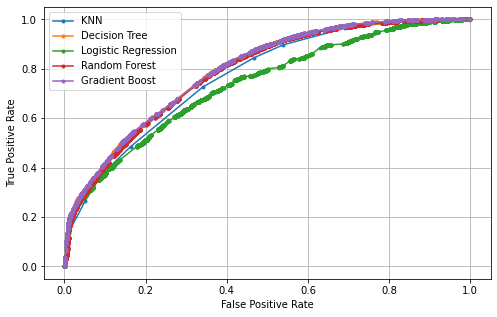

In [40]:
fig, ax=plt.subplots(figsize=(8,5))

plt.plot(knn_fp, knn_tp, marker='.', label='KNN')
plt.plot(dt_fp, dt_tp, marker='.', label='Decision Tree')
plt.plot(lr_fp, lr_tp, marker='.', label='Logistic Regression')
plt.plot(rf_fp, rf_tp, marker='.', label='Random Forest')
plt.plot(gb_fp, gb_tp, marker='.', label='Gradient Boost')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend()
plt.grid()
plt.show()